In [1]:
import torchvision
import numpy as np
import torch
import pydicom as dicom
import nibabel as nib
from torchvision import transforms
from torchvision.io import read_image
from torchvision.datasets import ImageFolder
import os
import matplotlib.pyplot as plt

IMG_EXTENSIONS = (".jpg", ".jpeg", ".png", ".ppm", ".bmp",
                  ".pgm", ".tif", ".tiff", ".webp", ".dcm", ".nii", ".nii.gz")


def img_normalize_target(img) -> torch.Tensor:
    """
    Normalize target image

    Args:
    img: (Tensor) - raw image

    Return:
    Normalized tensor with 0-1 values
    """
    return img / 2


def img_normalize_sample(img) -> torch.Tensor:
    """
    Normalize samples image

    Args:
    img: (Tensor) - raw image

    Return:
    Normalized tensor with 0-1 values
    """
    for i in range(img.shape[0]):
        img[i, :, :] = (img[i, :, :] - torch.min(img[i, :, :])
                           ) / (torch.max(img[i, :, :]) - torch.min(img[i, :, :]))
    return img    # (img - torch.mean(img)) / torch.std(img, False)


def conv_1img_3D_totensor(img_path) -> torch.tensor:
    """
    Convert NIFTI or DICOM 3D image file to pytorch tensor

    Args:
        img_path (str): path of the nii or dcm image.

    Returns:
        output (Tensor[image_channels, image_height, image_width])
    """
    if img_path.endswith(".dcm"):
        ds = dicom.dcmread(img_path)
        img = ds.pixel_array
        # imgmax = 2500   # v1-v3 not v4
        # vfun = np.vectorize(lambda x: x if x <= imgmax else imgmax)   # v1-v3 not v4
        # img = vfun(img)   # v1-v3 not v4
        # vfun = np.vectorize(lambda x: x if x >= 0 else 0.0)
        # img = vfun(img) # .astype(float)
        # img = torch.tensor((img / img.max()) * 255, dtype=torch.uint8) # v1-v2
        img = np.clip(img, 0, 2550).astype(np.uint8)
        img = torch.tensor(img, dtype=torch.uint8)  # v3-v4
    # print(image.shape)
    elif img_path.endswith((".nii", ".nii.gz")):
        img3d = nib.load(img_path).get_fdata()
        img = np.clip(img3d, -350, 350).astype(np.uint8)
        img = torch.tensor(img, dtype=torch.uint8)  # v3-v4
        img = img.permute(2, 1, 0)
    else:
        return None
    return img


[('segmentation-42.nii', 'volume-42.nii'), ('segmentation-53.nii', 'volume-53.nii')]
/run/media/alex/PartOfDiskWithWin7/LEARN/Longevity/Liver/datasets/kaggle.com_andrewmvd_liver-tumor-segmentation/testt/targets/segmentation-42.nii
/run/media/alex/PartOfDiskWithWin7/LEARN/Longevity/Liver/datasets/kaggle.com_andrewmvd_liver-tumor-segmentation/testt/samples/volume-42.nii
1 :  torch.Size([125, 512, 512])


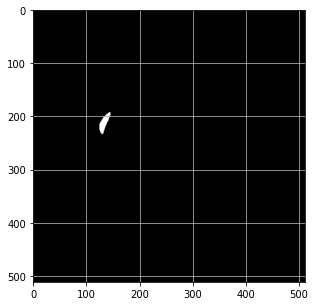

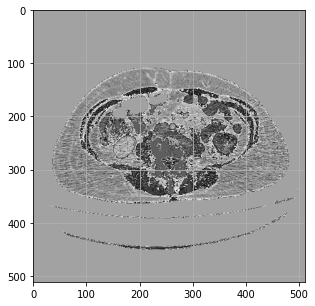

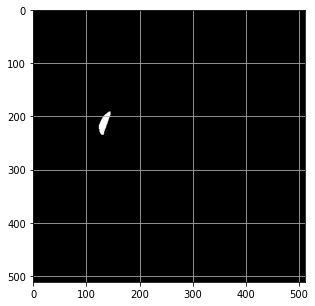

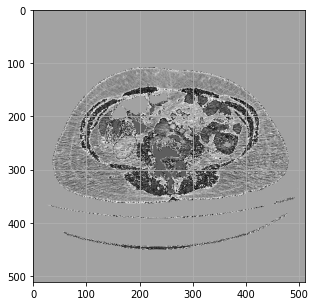

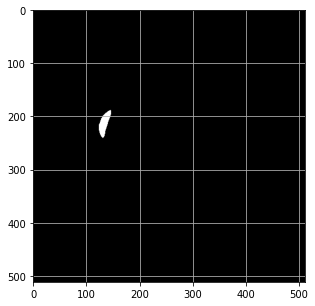

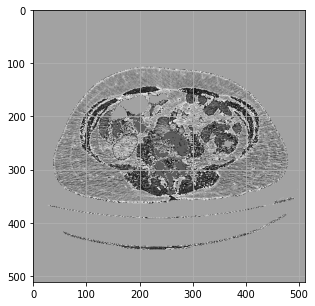

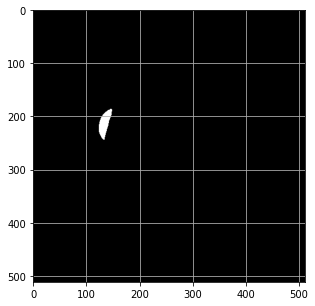

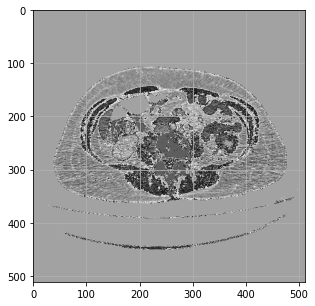

tail= 1 torch.Size([1, 3, 512, 512]) torch.Size([1, 3, 512, 512])
/run/media/alex/PartOfDiskWithWin7/LEARN/Longevity/Liver/datasets/kaggle.com_andrewmvd_liver-tumor-segmentation/testt/targets/segmentation-53.nii
/run/media/alex/PartOfDiskWithWin7/LEARN/Longevity/Liver/datasets/kaggle.com_andrewmvd_liver-tumor-segmentation/testt/samples/volume-53.nii
1 :  torch.Size([105, 512, 512])
tail= 1 torch.Size([1, 3, 512, 512]) torch.Size([1, 3, 512, 512])
/run/media/alex/PartOfDiskWithWin7/LEARN/Longevity/Liver/datasets/kaggle.com_andrewmvd_liver-tumor-segmentation/testt/targets/segmentation-42.nii
/run/media/alex/PartOfDiskWithWin7/LEARN/Longevity/Liver/datasets/kaggle.com_andrewmvd_liver-tumor-segmentation/testt/samples/volume-42.nii
1 :  torch.Size([125, 512, 512])


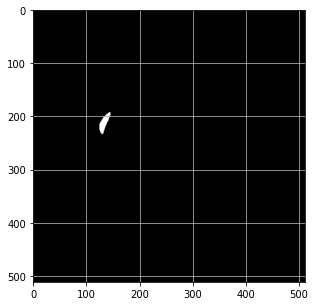

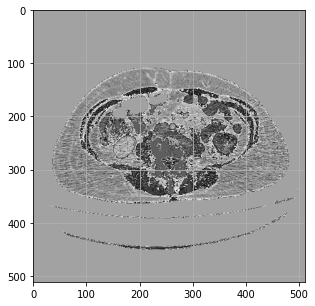

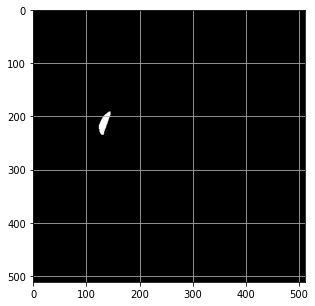

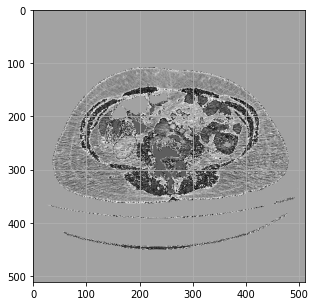

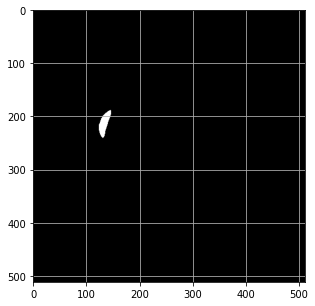

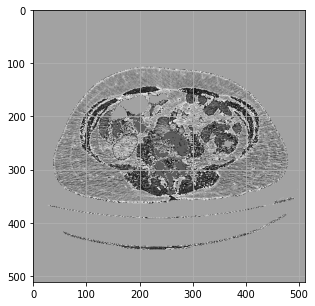

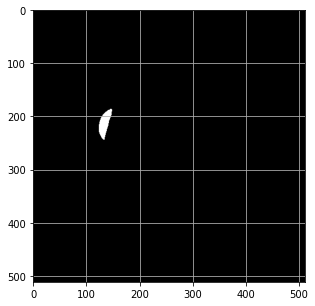

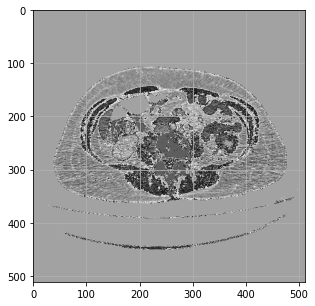

tail= 1 torch.Size([1, 3, 512, 512]) torch.Size([1, 3, 512, 512])
/run/media/alex/PartOfDiskWithWin7/LEARN/Longevity/Liver/datasets/kaggle.com_andrewmvd_liver-tumor-segmentation/testt/targets/segmentation-53.nii
/run/media/alex/PartOfDiskWithWin7/LEARN/Longevity/Liver/datasets/kaggle.com_andrewmvd_liver-tumor-segmentation/testt/samples/volume-53.nii
1 :  torch.Size([105, 512, 512])
tail= 1 torch.Size([1, 3, 512, 512]) torch.Size([1, 3, 512, 512])
/run/media/alex/PartOfDiskWithWin7/LEARN/Longevity/Liver/datasets/kaggle.com_andrewmvd_liver-tumor-segmentation/testt/targets/segmentation-42.nii
/run/media/alex/PartOfDiskWithWin7/LEARN/Longevity/Liver/datasets/kaggle.com_andrewmvd_liver-tumor-segmentation/testt/samples/volume-42.nii
1 :  torch.Size([125, 512, 512])


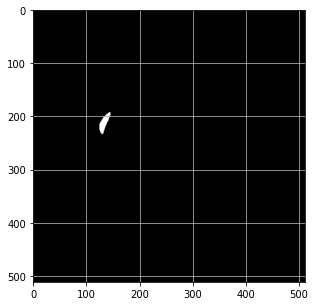

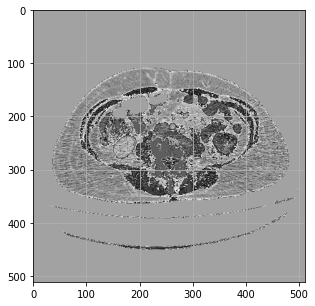

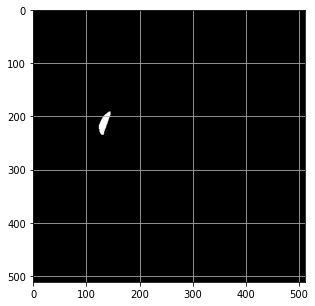

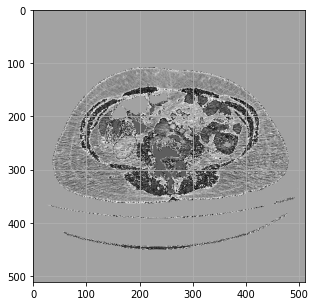

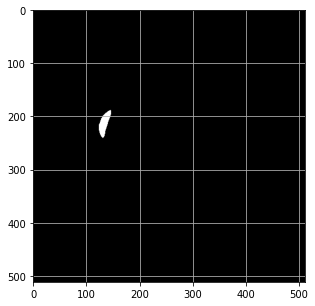

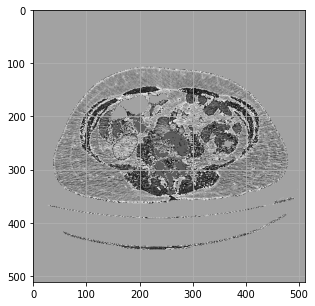

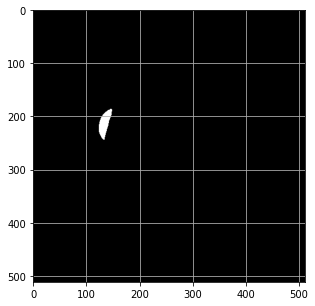

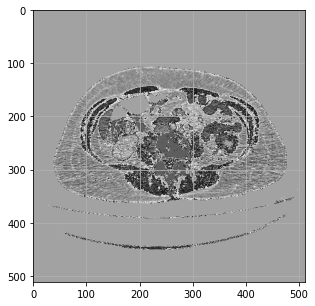

tail= 1 torch.Size([1, 3, 512, 512]) torch.Size([1, 3, 512, 512])
/run/media/alex/PartOfDiskWithWin7/LEARN/Longevity/Liver/datasets/kaggle.com_andrewmvd_liver-tumor-segmentation/testt/targets/segmentation-53.nii
/run/media/alex/PartOfDiskWithWin7/LEARN/Longevity/Liver/datasets/kaggle.com_andrewmvd_liver-tumor-segmentation/testt/samples/volume-53.nii
1 :  torch.Size([105, 512, 512])
tail= 1 torch.Size([1, 3, 512, 512]) torch.Size([1, 3, 512, 512])


In [13]:
def showNii2(img, imgs):
    for i in range(img.shape[0]):
        imgf = np.flipud(np.array(img[i, 0, :, :]))
        imgsf = np.flipud(np.array(imgs[i, 0, :, :]))
        if np.any(imgsf):
            plt.figure(figsize=(5, 5))
            # imgf = imgf.clip(-400, 400)
            plt.imshow(imgf, cmap='gray')
            plt.grid(visible=None)
            plt.show()
            plt.pause(0.001)
            plt.figure(figsize=(5, 5))
            plt.imshow(imgsf, cmap='gray')
            plt.grid(visible=None)
            plt.show()
            plt.pause(0.001)


def showNii(img):
    for i in range(img.shape[0]):
        imgf = np.flipud(np.array(img[i, :, :]))
        if np.any(imgf):
            plt.figure(figsize=(5, 5))
            # im = img[i, :, :].clip(np.mean(
            #     img[i, :, :])-np.std(img[i, :, :]), np.mean(img[i, :, :])+np.std(img[i, :, :]))
            # img[i, :, :].clip(-1000, 400)
            imgf = imgf.clip(-400, 400)
            plt.imshow(imgf, cmap='gray')
            plt.grid(visible=None)
            plt.show()
            plt.pause(0.001)


def triple(i, t, s, sz):
    target = torch.zeros([sz, 3, t.shape[1], t.shape[2]])
    sample = torch.zeros([sz, 3, s.shape[1], s.shape[2]])
    for j in range(sz):  #
        # print("t[i+j:i+j+1, :, :]=", "i=", i, "j=", j)
        # showNii(t[i+j:i+j+1, :, :])
        target[j, :, :, :] = torch.broadcast_to(
            t[i+j, :, :], (3,)+tuple(t[i+j, :,:].shape))
        sample[j, :, :, :] = torch.broadcast_to(
            s[i+j, :, :], (3,)+tuple(s[i+j, :, :].shape))
        # print("target ","j=",j)
        # showNii(target[j, :, :, :])
        # print("sample ", "j=", j)
        # showNii(sample[j, :, :, :])

    # print("t=")
    # showNii(t)
    # print("s=")
    # showNii(s)
    # print("t=")
    # showNii2(target, sample)
    # print("s=")
    return target, sample


def downloader(k, nxt):
    for k in range(len(st)):
        if k==0:
            # k = 0
            nxt = 0
        if nxt == 0:
            if k >= len(st):
                k = 0
            ts = st[k]
            t = conv_1img_3D_totensor(os.path.join(targets_path, ts[0]))
            print(os.path.join(targets_path, ts[0]))
            # t = img_normalize_target(t)
            s = conv_1img_3D_totensor(os.path.join(samples_path, ts[1]))
            print(os.path.join(samples_path, ts[1]))
            # s = img_normalize_sample(s)
            print("1 : ",t.shape)
            tail = t.shape[0] % batch_size
            nmax = t.shape[0]//batch_size
        for nxt in range(nmax):
            target, sample = triple(nxt, t, s, batch_size)
            yield nxt, k, target, sample
        else:
            if tail > 0:
                target, sample = triple(nmax, t, s, tail)
                print("tail=", tail, target.shape, sample.shape)
            nxt = 0
            k += 1
            yield nxt, k, target, sample


data_path = "/run/media/alex/PartOfDiskWithWin7/LEARN/Longevity/Liver/datasets/kaggle.com_andrewmvd_liver-tumor-segmentation/testt/"
# test_dir = data_path + "test"
# data_path = "/run/media/alex/PartOfDiskWithWin7/LEARN/Longevity/Liver/datasets/wiki.cancerimagingarchive.net/Crowds Cure Cancer: Data collected at the RSNA 2017 annual meeting/manifest-KTt2tScD7164745271364348431/TCGA-LIHC/1-test/"
sample_targets = ['targets', 'samples']
samples = sorted(os.listdir(os.path.join(data_path, sample_targets[1])))
targets = sorted(os.listdir(os.path.join(data_path, sample_targets[0])))
targets_path = os.path.join(data_path, sample_targets[0])
samples_path = os.path.join(data_path, sample_targets[1])
st = list(zip(targets, samples))
print(st)
batch_size = 4
n=0
k=0

for _ in [0,1,2]:
    print("=========================================")
    for n, k, target, sample in downloader(k, n):
        # print("n=", n, "k=", k, "t=", target.shape, "s=", sample.shape)
        if n == 10 and k == 0:
            showNii2(target, sample)
# print(st, next(st))


In [ ]:
x = torch.tensor([1, 2, 3, 4])
print(x.shape)
print(torch.unsqueeze(x, 0))
print(torch.unsqueeze(x, 0).shape)

print(torch.unsqueeze(x, 1))
print(torch.unsqueeze(x, 1).shape)


torch.Size([4])
tensor([[1, 2, 3, 4]])
torch.Size([1, 4])
tensor([[1],
        [2],
        [3],
        [4]])
torch.Size([4, 1])
